In [1]:
# !kaggle datasets download -d blastchar/telco-customer-churn --unzip -p ../data/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(exclude=np.number)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
df.duplicated().sum()

0

In [9]:
def column_summary(df, simple=True):
    summary_data = []

    for col_name in df.columns:
        col_summary = {}
        col_summary["col_name"] = col_name
        col_summary["col_dtype"] = df[col_name].dtype
        col_summary["num_of_nulls"] = df[col_name].isnull().sum()
        col_summary["num_of_non_nulls"] = df[col_name].notnull().sum()
        col_summary["null_present"] = col_summary["num_of_nulls"] > 0
        col_summary["num_of_distinct_values"] = df[col_name].nunique()
        col_summary["distinct_values_counts"] = df[col_name].value_counts().head(10).to_dict()
        if not simple:
            col_summary["min_value"] = df[col_name].min()
            col_summary["max_value"] = df[col_name].max()
            col_summary["mean"] = df[col_name].mean() if np.issubdtype(df[col_name].dtype, np.number) else None
            col_summary["median"] = df[col_name].median() if np.issubdtype(df[col_name].dtype, np.number) else None
        
        summary_data.append(col_summary)

    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [10]:
column_summary(df, simple=True)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,null_present,num_of_distinct_values,distinct_values_counts
0,customerID,object,0,7043,False,7043,"{'7590-VHVEG': 1, '3791-LGQCY': 1, '6008-NAIXK..."
1,gender,object,0,7043,False,2,"{'Male': 3555, 'Female': 3488}"
2,SeniorCitizen,int64,0,7043,False,2,"{0: 5901, 1: 1142}"
3,Partner,object,0,7043,False,2,"{'No': 3641, 'Yes': 3402}"
4,Dependents,object,0,7043,False,2,"{'No': 4933, 'Yes': 2110}"
5,tenure,int64,0,7043,False,73,"{1: 613, 72: 362, 2: 238, 3: 200, 4: 176, 71: ..."
6,PhoneService,object,0,7043,False,2,"{'Yes': 6361, 'No': 682}"
7,MultipleLines,object,0,7043,False,3,"{'No': 3390, 'Yes': 2971, 'No phone service': ..."
8,InternetService,object,0,7043,False,3,"{'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}"
9,OnlineSecurity,object,0,7043,False,3,"{'No': 3498, 'Yes': 2019, 'No internet service..."


In [11]:
def column_visualization(df):
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    nonnumerical_columns = df.select_dtypes(exclude=[np.number]).columns
    
    # Perform univariate analysis on numerical columns
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number) and len(df[column].unique()) > 10:
            plt.figure(figsize=(6, 3))
            sns.histplot(df[column], kde=True)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

            plt.figure(figsize=(3, 4))
            sns.boxplot(df[column])
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.ylabel('valeu')
            plt.show()

        elif df[column].nunique() < 10:
            plt.figure(figsize=(6, 3))
            ax = sns.countplot(df, x=column, hue=column, palette="tab10")
            plt.title(f'Count of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            if not np.issubdtype(df[column].dtype, np.number):
                plt.xticks(rotation=45)

            # Annotate each bar with its count
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 5), 
                            textcoords = 'offset points')
            plt.show()
            print()

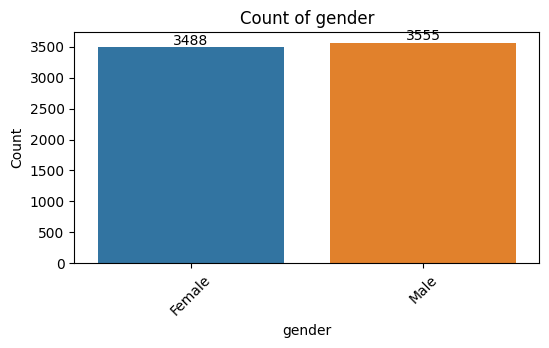

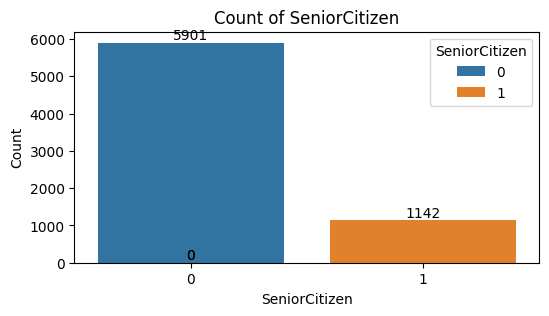

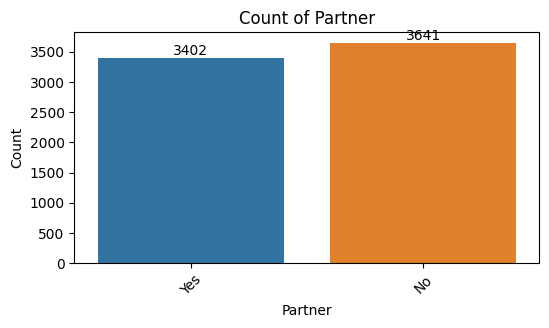

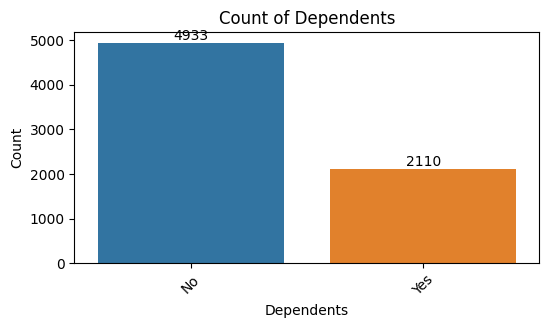

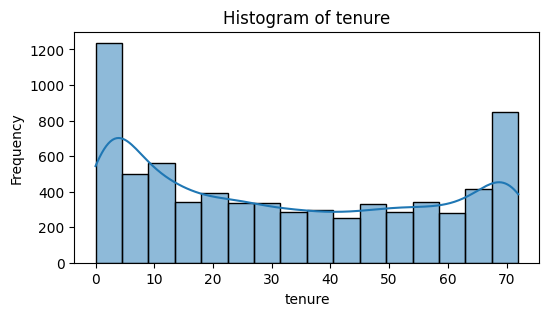

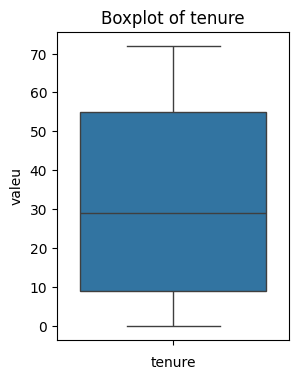

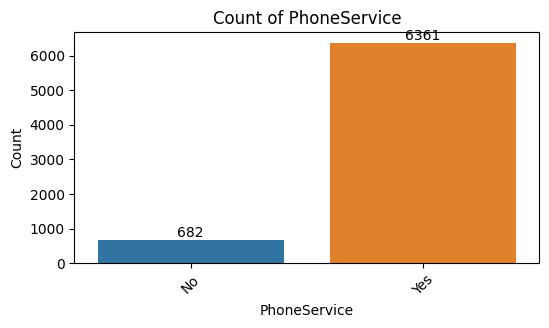

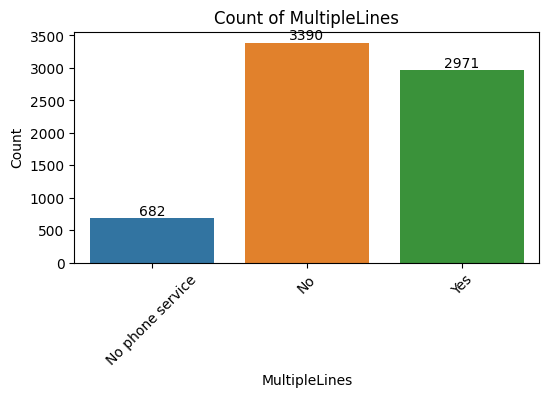

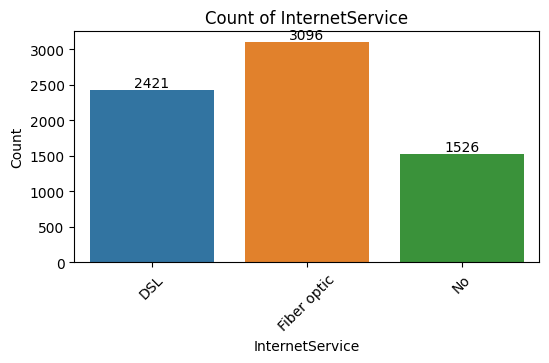

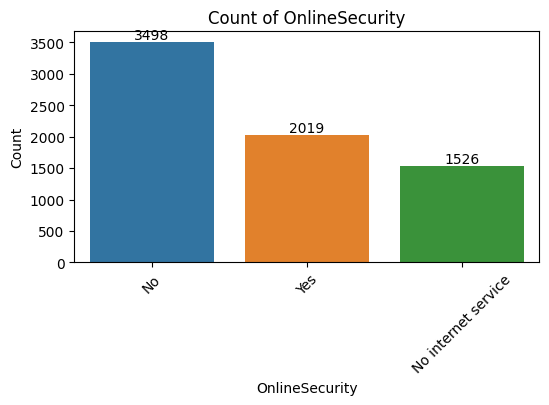

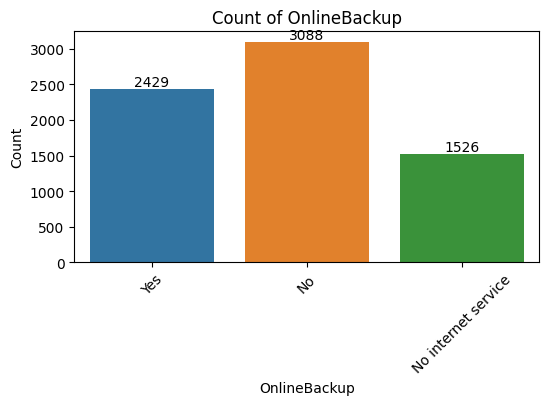

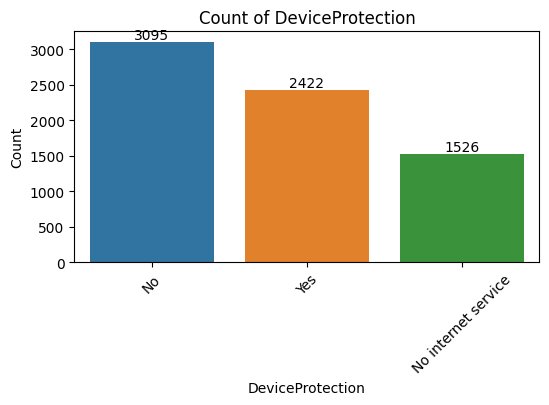

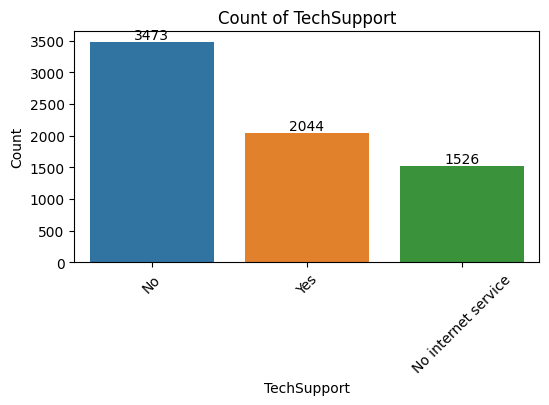

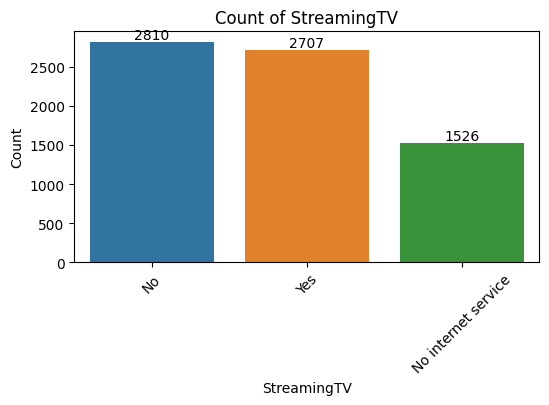

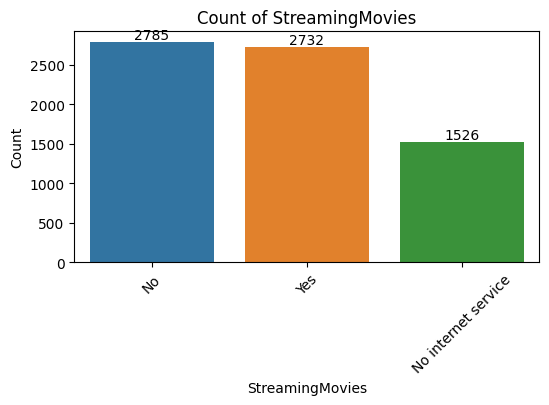

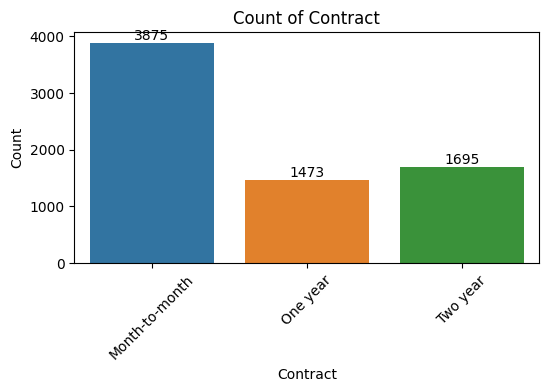

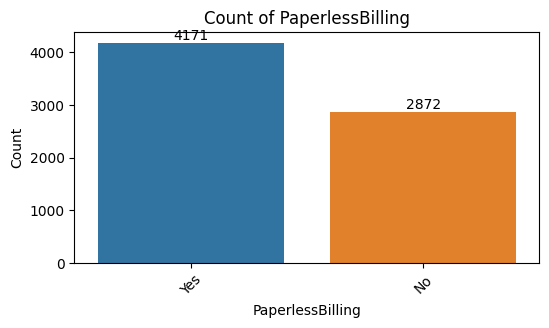

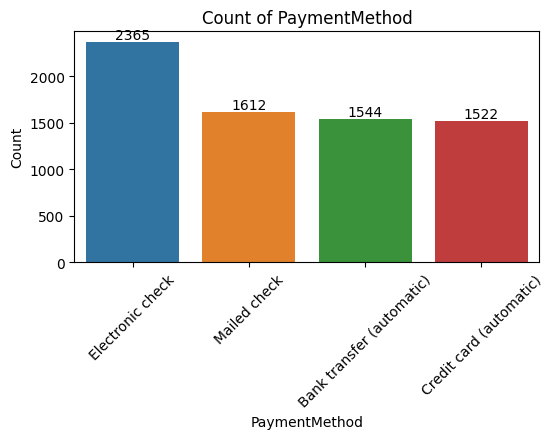

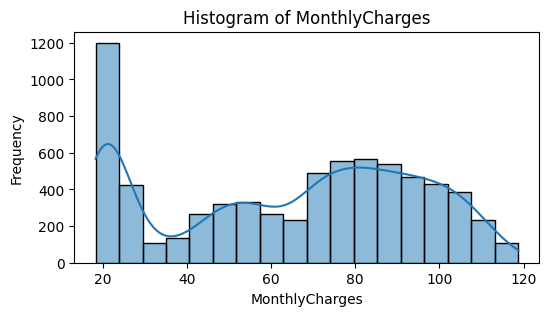

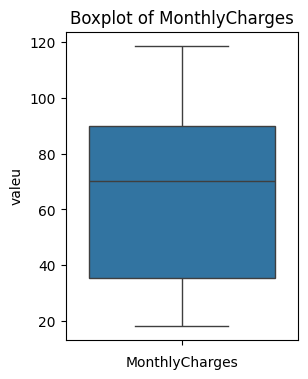

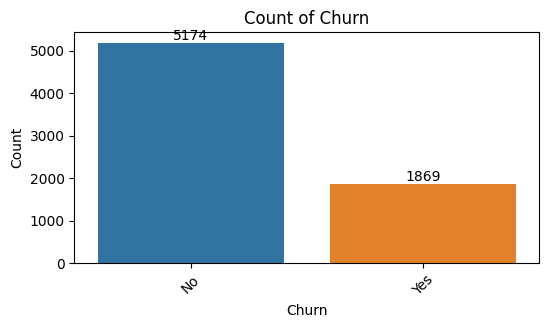

In [12]:
column_visualization(df)